# RL Graph Environment: Learning from one instance

In [1]:
from job_shop_lib.reinforcement_learning import (
    # MakespanReward,
    SingleJobShopGraphEnv,
    ObservationSpaceKey,
    IdleTimeReward,
    ObservationDict,
)
from job_shop_lib.dispatching.feature_observers import (
    FeatureObserverConfig,
    FeatureObserverType,
    FeatureType,
)
from job_shop_lib.graphs import build_disjunctive_graph
from job_shop_lib.benchmarking import load_benchmark_instance

In [2]:
instance = load_benchmark_instance("ft06")
job_shop_graph = build_disjunctive_graph(instance)
feature_observer_configs = [
    FeatureObserverConfig(
        FeatureObserverType.IS_READY,
        kwargs={"feature_types": [FeatureType.JOBS]},
    )
]

env = SingleJobShopGraphEnv(
    job_shop_graph=job_shop_graph,
    feature_observer_configs=feature_observer_configs,
    reward_function_type=IdleTimeReward,
    render_mode="human",  # Try "save_video"
    render_config={
        "video_config": {"fps": 4}
    }
)

In [3]:
env.observation_space

Dict('edge_list': MultiDiscrete([[38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38
  38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38
  38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38
  38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38
  38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38
  38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38
  38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38
  38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38
  38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38
  38 38 38 38 38 38]
 [38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38
  38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38
  38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38
  38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 

In [4]:
len(job_shop_graph.nodes)

38

In [5]:
import random

random.seed(42)


def random_action(observation: ObservationDict) -> tuple[int, int]:
    ready_operations = []
    for operation_id, is_ready in enumerate(
        observation[ObservationSpaceKey.JOBS.value].ravel()
    ):
        if is_ready == 1.0:
            ready_operations.append(operation_id)

    operation_id = random.choice(ready_operations)
    machine_id = -1  # We can use -1 if each operation can only be scheduled
    # in one machine.
    return (operation_id, machine_id)

In [6]:
env.get_observation()[ObservationSpaceKey.JOBS]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [7]:
random_action(env.get_observation())

(5, -1)

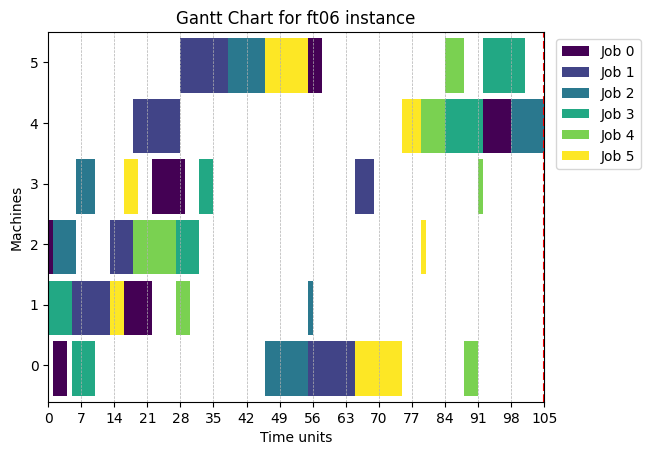

In [8]:
from IPython.display import clear_output

done = False
obs, _ = env.reset()
while not done:
    action = random_action(obs)
    obs, reward, done, *_ = env.step(action)
    if env.render_mode == "human":
        env.render()
        clear_output(wait=True)

if env.render_mode == "save_video" or env.render_mode == "save_gif":
    env.render()

In [9]:
import numpy as np

rewards = np.array(env.reward_function.rewards)
print(f"{len(list(filter(lambda x: x != 0, rewards)))} zeros out of {len(rewards)}")

19 zeros out of 36


In [10]:
rewards.mean()

-9.11111111111111

In [11]:
rewards.sum()

-328